In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# Create a visual showing the relationship between horsepower and fuel economy

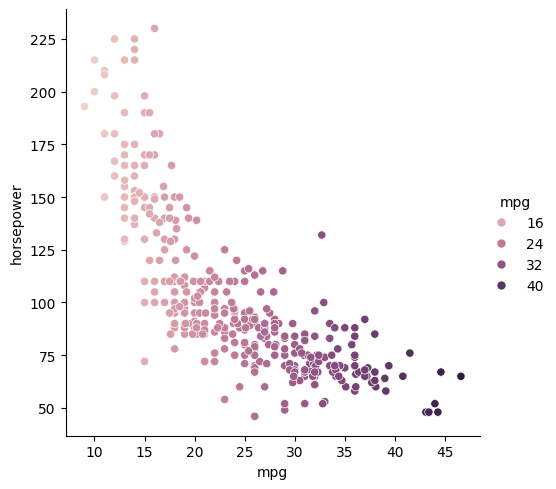

In [69]:
# Table observations: The higher the horsepower, the lower the fuel economy
sns.relplot(data=mpg, x='mpg', y='horsepower', hue='mpg')

The highest horsepower charted with mpg over 30 is just over 125. As horsepower goes up, mpg goes down. Higher engine power requires more fuel and therefore makes the car less fuel-efficient.

In [5]:
# Create a table summarizing fuel economy by country of origin.
mpg_by_country=mpg.groupby('origin')['mpg'].mean().round(2).reset_index()

In [6]:
mpg_by_country

,origin,mpg
0,europe,27.89
1,japan,30.45
2,usa,20.08


# Create a visual showing how fuel economy has changed over time

Text(0, 0.5, 'Miles Per Gallon')

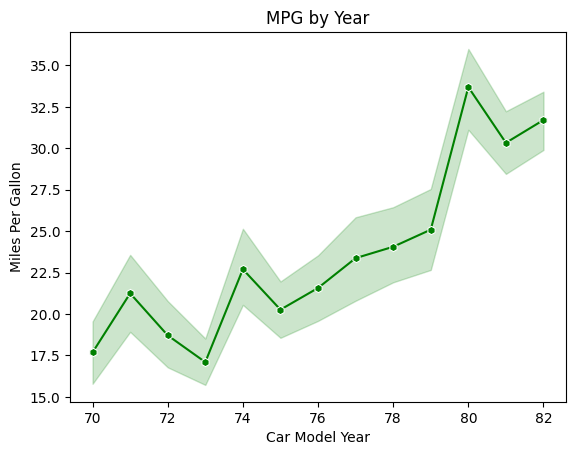

In [7]:
sns.lineplot(data=mpg, x='model_year', y='mpg', marker='h', color='green')
plt.title('MPG by Year')
plt.xlabel('Car Model Year')
plt.ylabel('Miles Per Gallon')

Cars have generally become more fuel-efficient over time.

# Create two other visuals or tables related to fuel economy.
# Visual 1: Fuel Economy by Manufacturer

In [9]:
mpg.name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [10]:
import numpy as np

In [64]:
# Create a mapping of keywords to manufacturers, including multiple keywords for Volkswagen
manufacturer_mapping = {
    "dodge": "Dodge",
    "ford": "Ford",
    "vw": "Volkswagen",
    "volkswagen": "Volkswagen",
    "vokswagen" : "Volkswagen",
    "amc": "AMC",
    "audi": "Audi",
    "bmw": "BMW",
    "buick": "Buick",
    "cadillac": "Cadillac",
    "chrysler": "Chrysler",
    "datsun": "Datsun/Nissan",
    "chevrolet": "Chevrolet",
    "chevroelt" : "Chevrolet",
    "chevy" : "Chevrolet",
    "fiat": "Fiat",
    "honda": "Honda",
    "mazda": "Mazda",
    "maxda" : "Mazda",
    "mercedes-benz": "Mercedes-Benz",
    "mercedes benz" : "Mercedes-Benz",
    "mercury": "Mercury",
    "nissan": "Nissan",
    "oldsmobile": "Oldsmobile",
    "opel": "Opel",
    "peugeot": "Peugeot",
    "plymouth": "Plymouth",
    "renault": "Renault",
    "saab": "Saab",
    "subaru": "Subaru",
    "toyota": "Toyota",
    "toyouta" : "Toyota",
    "triumph": "Triumph",
    "volvo": "Volvo",
    "pontiac": "Pontiac",
    "hi" : "IHC",
    "capri" : "Capri",
}

# Apply mapping based on name (case-insensitive)
mpg['manufacturer'] = mpg['name'].apply(
    lambda x: next((manufacturer_mapping[manufacturer] for manufacturer in manufacturer_mapping if manufacturer in x.lower()), 'Other')
)

mpg_by_manufacturer = mpg.groupby('manufacturer')['mpg'].mean().reset_index()

In [62]:
mpg.loc[mpg['manufacturer'] == 'Other']

#Checked here for manufacturers that fell under 'Other' to ensure I included all typos or outliers in my code above.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer


In [56]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [57]:
mpg_by_manufacturer = mpg.groupby('manufacturer')['mpg'].mean().reset_index()

Text(32.322839506172826, 0.5, 'Manufacturer')

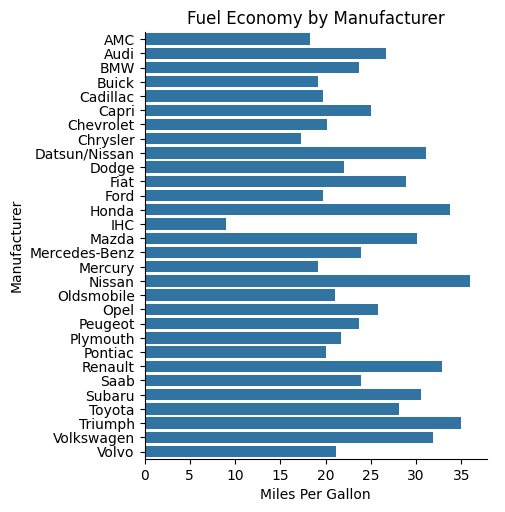

In [68]:
sns.catplot(data=mpg_by_manufacturer, x='mpg', y='manufacturer', kind='bar')
plt.title('Fuel Economy by Manufacturer')
plt.xlabel('Miles Per Gallon')
plt.ylabel('Manufacturer')

Fuel Economy by Manufacturer. Nissan has the lead in fuel economy, with Triumph and Honda following behind. The lowest fuel economy appears to be Chrysler, as IHC only has a single entry in this table (making it an outlier in the data).

# Visual 2: Fuel Economy and Weight

Text(37.38782638888889, 0.5, 'Miles Per Gallon')

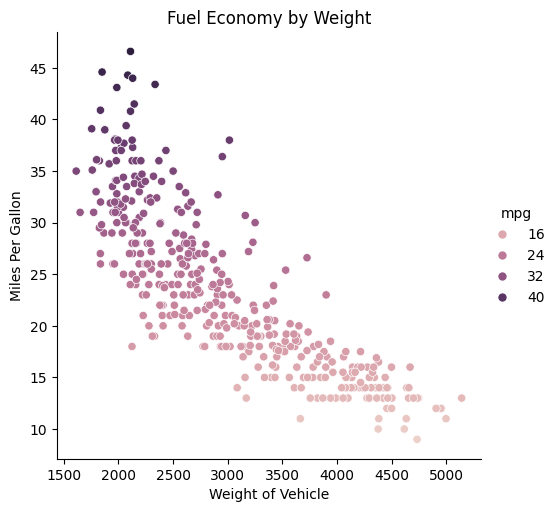

In [81]:
sns.relplot(data=mpg, x='weight', y='mpg', hue='mpg')
plt.title('Fuel Economy by Weight')
plt.xlabel('Weight of Vehicle')
plt.ylabel('Miles Per Gallon')

In [84]:
avg_weight=mpg.groupby('model_year')['weight'].mean().round(2).reset_index()

In [85]:
avg_weight

,model_year,weight
0,70,3372.79
1,71,2995.43
2,72,3237.71
3,73,3419.02
4,74,2877.93
5,75,3176.80
6,76,3078.74
7,77,2997.36
8,78,2861.81
9,79,3055.34


Just for fun, let's see how weight of vehicles has generally changed over time, to compare with our mpg over time visual above.

<Axes: xlabel='model_year', ylabel='weight'>

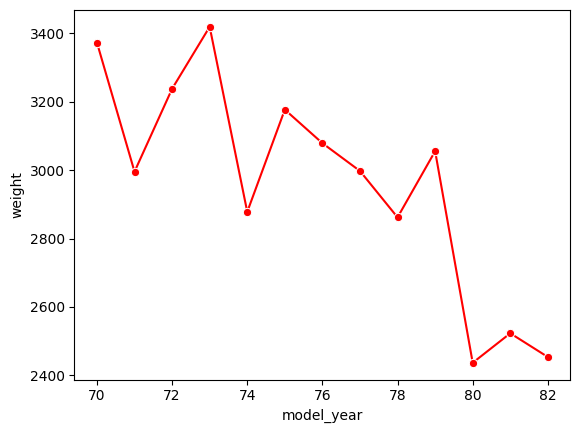

In [87]:
sns.lineplot(data=avg_weight, x='model_year', y='weight', marker='o', color='red')

Average weight of vehicles has gradually gone down over time, with the steepest drop occurring in 1979 models. Comparing this with our MPG By Year visual and our MPG and Weight table, we can infer that as time has gone down, weight has gone down and MPG has improved.